In [1]:
import cv2 
import pixel_processing
from plotly.subplots import make_subplots
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px 
import plotly.io as pio

## Pixel Processing

In [2]:
help(pixel_processing.change_brightness)

Help on function change_brightness in module pixel_processing:

change_brightness(image_path, brightness_level: int)
    Function to change the brightness of image with pixel level operation
    Pixels are added by the brightness level
    
    Arguments:
        image -- path of the image to read
        brightness_level -- level of brightness for the new image



In [3]:
help(pixel_processing.change_contrast)

Help on function change_contrast in module pixel_processing:

change_contrast(image_path, contrast_level: int)
    Function to change the contrast of image with pixel level operation
    Pixels are multiplied by the contrast level
    
    Arguments:
        image -- path of the image to read
        brightness_level -- level of brightness for the new image



In [4]:
img_path = "../flowers/bougainvillea_00019.jpg"
img = cv2.imread(img_path)
contrast_img = pixel_processing.change_contrast(img_path, 1.3)
brightness_img = pixel_processing.change_brightness(img_path, -40)

In [5]:
images = [img, contrast_img, brightness_img]

In [8]:
fig = make_subplots(rows=3, cols=2, 
                    subplot_titles=['Image 1', 'Histogram 1', 
                                    'Image 2', 'Histogram 2', 
                                    'Image 3', 'Histogram 3'],
                    column_widths=[0.5, 0.5])  # Make image and histogram the same width

for i in range(1, 4):
    img = images[i-1]
    
    fig.add_trace(go.Image(z=img), row=i, col=1)
    
    for channel, color in enumerate(['red', 'green', 'blue']):
        fig.add_trace(
            go.Histogram(
                x=img[..., channel].ravel(),
                opacity=0.5,
                marker_color=color,
                name="%s channel" %color,
                histnorm='probability',  # Normalized histograms
            ),
            row=i, col=2  # Second column for histogram
        )
    
    # Use logarithmic scale for y-axis 
    # displays smaller values better
    fig.update_yaxes(type="log", row=i, col=2)


fig.update_layout(height=700,  # Increase the height for larger images
                  width=1000, 
                  title_text="Images and Color Histograms",
                  showlegend=False, 
                  bargap=0.1)

# # Write the final figure
# pio.write_image(fig, 'pixel_processing1', format='png', scale=1, width=1000, height=800)
pio.write_image(fig, 'pixel_processing1.png', width=3840, height=2160)

![](pixel_processing1.png)

## Convolution || Linear Filter

In [2]:
import convolution

(359, 638, 3)
(359, 638, 3)


In [12]:
image = cv2.imread('petal.jpg')

print(image.shape)

(1173, 1200, 3)


In [13]:
# sobel filter 
kernel = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])


# laplacian filter
# kernel = np.array([[0, 1, 0],
#                   [1, -4, 1],
#                   [0, 1, 0]])


# with unsharp mask 
# kernel = np.array([[0, -1, 0],
#                   [-1, 5, -1],
#                   [0, -1, 0]])

In [17]:
%%time
import time 

start_time = time.time()
convolved_image = convolution.convolve(image, kernel=kernel)
end_time = time.time()

simple_time = end_time - start_time
print(simple_time)

29.779869318008423
CPU times: total: 29.8 s
Wall time: 29.8 s


In [18]:
%%time
start_time = time.time()
convolved_image_vectorized = convolution.convolve_vectorized(image, kernel)
end_time = time.time()

vectorized_time = end_time - start_time
print(vectorized_time)

19.206893920898438
CPU times: total: 19.1 s
Wall time: 19.2 s


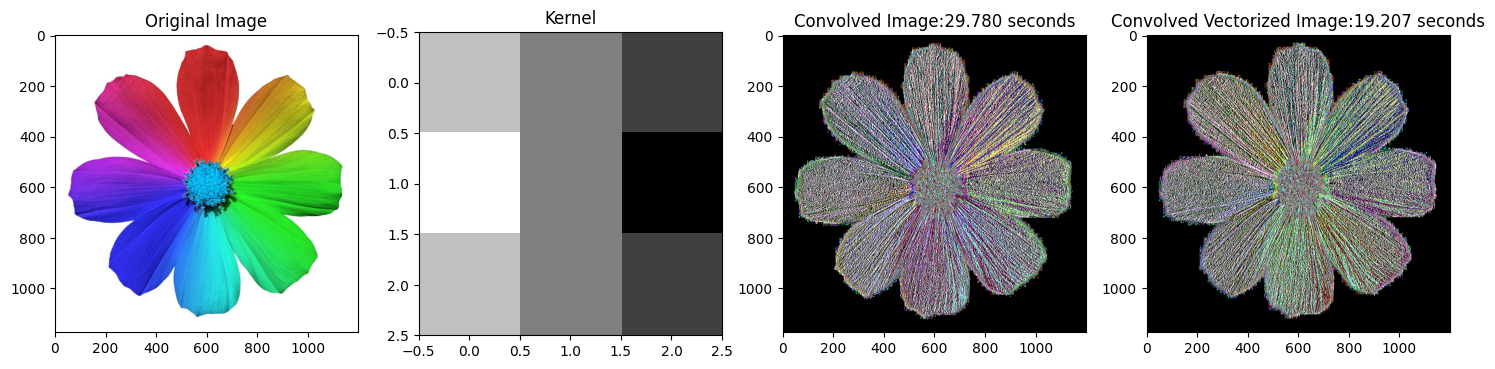

In [21]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(18, 16))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(kernel, cmap='gray')
plt.title('Kernel')

plt.subplot(1, 4, 3)
plt.imshow(convolved_image, cmap='gray')
plt.title(f'Convolved Image:{simple_time:.3f} seconds')

plt.subplot(1, 4, 4)
plt.imshow(convolved_image_vectorized, cmap='gray')
plt.title(f'Convolved Vectorized Image:{vectorized_time:.3f} seconds')

plt.show()